# Лабораторная работа №2

In [ ]:
!pip install pandas scikit-learn pymorphy2 nltk

In [ ]:
import pandas as pd
import re
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pymorphy2
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.read_csv('data.csv')
df

,Unnamed: 0.1,Unnamed: 0,author_link,author_name,stars,date,title,body
0,0,0,/users/ksellena,ksellena,5,2022-12-16T13:48:16+01:00,\nАватар: Путь воды → 13 лет ожиданий и вот он...,\nПривет! Наконец-то он вышел! Долгожданное пр...
1,1,1,/users/nataliya34,nataliya34,2,2022-12-17T11:26:17+01:00,"\nЭто провал, Карл!","\nПусть я буду той Бабой Ягой, которая против...."
2,2,2,/users/gala58-0,Tovaroved007,2,2023-01-09T11:46:05+01:00,"\nАватар:Путь воды - фильм, который опоздал на...","\nПомню как в 2009 году меня поразил фильм ""Ав..."
3,3,3,/users/linara1985,Linara1985,3,2023-01-19T11:05:14+01:00,"\nФильм о том, как отцовство может сделать из ...",\nЗдравствуйте. Сегодня я хочу поделиться с ва...
4,4,4,/users/vladimirkk,VladimirKK,5,2022-12-25T19:13:40+01:00,"\nТри часа в IMAX, когда визуальная составляющ...",\nМесто просмотра - Кыргыстан. Локация - IMAX ...
...,...,...,...,...,...,...,...,...
134,69,69,/users/leilalevina24,leila_levina24,5,2023-01-08T19:23:03+01:00,\nПолное погружение в мир Пандоры! Волшебно! С...,"\nУдивительно , как можно за 3 часа побывать н..."
135,70,70,/users/adbi770,adbi770,5,2023-01-14T10:57:30+01:00,\nОчень ждал,"\nДобрый день! Ждал этого фильма, уже смотрел ..."
136,71,71,/users/midsummer555,midsummer555,5,2022-12-20T18:06:51+01:00,"\nАватар, моя любимая сказка",\nКаждые новогодние праздники пересматриваем А...
137,72,72,/users/viktoriya575,Виктория575,5,2023-01-19T12:33:23+01:00,\nнаконец то!,\nСтолько лет мы ждали продолжение этого захва...


In [ ]:
# векторизация re
def tokenize_re(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return tokens

df['tokens_re'] = df['body'].apply(tokenize_re)
df

,Unnamed: 0.1,Unnamed: 0,author_link,author_name,stars,date,title,body,tokens_re
0,0,0,/users/ksellena,ksellena,5,2022-12-16T13:48:16+01:00,\nАватар: Путь воды → 13 лет ожиданий и вот он...,\nПривет! Наконец-то он вышел! Долгожданное пр...,"[привет, наконец, то, он, вышел, долгожданное,..."
1,1,1,/users/nataliya34,nataliya34,2,2022-12-17T11:26:17+01:00,"\nЭто провал, Карл!","\nПусть я буду той Бабой Ягой, которая против....","[пусть, я, буду, той, бабой, ягой, которая, пр..."
2,2,2,/users/gala58-0,Tovaroved007,2,2023-01-09T11:46:05+01:00,"\nАватар:Путь воды - фильм, который опоздал на...","\nПомню как в 2009 году меня поразил фильм ""Ав...","[помню, как, в, 2009, году, меня, поразил, фил..."
3,3,3,/users/linara1985,Linara1985,3,2023-01-19T11:05:14+01:00,"\nФильм о том, как отцовство может сделать из ...",\nЗдравствуйте. Сегодня я хочу поделиться с ва...,"[здравствуйте, сегодня, я, хочу, поделиться, с..."
4,4,4,/users/vladimirkk,VladimirKK,5,2022-12-25T19:13:40+01:00,"\nТри часа в IMAX, когда визуальная составляющ...",\nМесто просмотра - Кыргыстан. Локация - IMAX ...,"[место, просмотра, кыргыстан, локация, imax, б..."
...,...,...,...,...,...,...,...,...,...
134,69,69,/users/leilalevina24,leila_levina24,5,2023-01-08T19:23:03+01:00,\nПолное погружение в мир Пандоры! Волшебно! С...,"\nУдивительно , как можно за 3 часа побывать н...","[удивительно, как, можно, за, 3, часа, побыват..."
135,70,70,/users/adbi770,adbi770,5,2023-01-14T10:57:30+01:00,\nОчень ждал,"\nДобрый день! Ждал этого фильма, уже смотрел ...","[добрый, день, ждал, этого, фильма, уже, смотр..."
136,71,71,/users/midsummer555,midsummer555,5,2022-12-20T18:06:51+01:00,"\nАватар, моя любимая сказка",\nКаждые новогодние праздники пересматриваем А...,"[каждые, новогодние, праздники, пересматриваем..."
137,72,72,/users/viktoriya575,Виктория575,5,2023-01-19T12:33:23+01:00,\nнаконец то!,\nСтолько лет мы ждали продолжение этого захва...,"[столько, лет, мы, ждали, продолжение, этого, ..."


In [ ]:
# векторизация Counter
def tokenize_counter(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    return Counter(tokens)

df['tokens_counter'] = df['body'].apply(tokenize_counter)
df

,Unnamed: 0.1,Unnamed: 0,author_link,author_name,stars,date,title,body,tokens_re,tokens_counter
0,0,0,/users/ksellena,ksellena,5,2022-12-16T13:48:16+01:00,\nАватар: Путь воды → 13 лет ожиданий и вот он...,\nПривет! Наконец-то он вышел! Долгожданное пр...,"[привет, наконец, то, он, вышел, долгожданное,...","{'привет': 1, 'наконец': 1, 'то': 5, 'он': 3, ..."
1,1,1,/users/nataliya34,nataliya34,2,2022-12-17T11:26:17+01:00,"\nЭто провал, Карл!","\nПусть я буду той Бабой Ягой, которая против....","[пусть, я, буду, той, бабой, ягой, которая, пр...","{'пусть': 1, 'я': 7, 'буду': 1, 'той': 1, 'баб..."
2,2,2,/users/gala58-0,Tovaroved007,2,2023-01-09T11:46:05+01:00,"\nАватар:Путь воды - фильм, который опоздал на...","\nПомню как в 2009 году меня поразил фильм ""Ав...","[помню, как, в, 2009, году, меня, поразил, фил...","{'помню': 1, 'как': 4, 'в': 21, '2009': 3, 'го..."
3,3,3,/users/linara1985,Linara1985,3,2023-01-19T11:05:14+01:00,"\nФильм о том, как отцовство может сделать из ...",\nЗдравствуйте. Сегодня я хочу поделиться с ва...,"[здравствуйте, сегодня, я, хочу, поделиться, с...","{'здравствуйте': 1, 'сегодня': 1, 'я': 13, 'хо..."
4,4,4,/users/vladimirkk,VladimirKK,5,2022-12-25T19:13:40+01:00,"\nТри часа в IMAX, когда визуальная составляющ...",\nМесто просмотра - Кыргыстан. Локация - IMAX ...,"[место, просмотра, кыргыстан, локация, imax, б...","{'место': 2, 'просмотра': 1, 'кыргыстан': 1, '..."
...,...,...,...,...,...,...,...,...,...,...
134,69,69,/users/leilalevina24,leila_levina24,5,2023-01-08T19:23:03+01:00,\nПолное погружение в мир Пандоры! Волшебно! С...,"\nУдивительно , как можно за 3 часа побывать н...","[удивительно, как, можно, за, 3, часа, побыват...","{'удивительно': 1, 'как': 1, 'можно': 1, 'за':..."
135,70,70,/users/adbi770,adbi770,5,2023-01-14T10:57:30+01:00,\nОчень ждал,"\nДобрый день! Ждал этого фильма, уже смотрел ...","[добрый, день, ждал, этого, фильма, уже, смотр...","{'добрый': 1, 'день': 1, 'ждал': 1, 'этого': 1..."
136,71,71,/users/midsummer555,midsummer555,5,2022-12-20T18:06:51+01:00,"\nАватар, моя любимая сказка",\nКаждые новогодние праздники пересматриваем А...,"[каждые, новогодние, праздники, пересматриваем...","{'каждые': 1, 'новогодние': 1, 'праздники': 1,..."
137,72,72,/users/viktoriya575,Виктория575,5,2023-01-19T12:33:23+01:00,\nнаконец то!,\nСтолько лет мы ждали продолжение этого захва...,"[столько, лет, мы, ждали, продолжение, этого, ...","{'столько': 1, 'лет': 1, 'мы': 1, 'ждали': 1, ..."


In [ ]:
# CountVectorizer
vectorizer_count = CountVectorizer(stop_words=stopwords.words('russian'))
X_count = vectorizer_count.fit_transform(df['body'])
df_count = pd.DataFrame(X_count.toarray(), columns=vectorizer_count.get_feature_names_out())
df_count

,000,000сборы,03,075,10,100,1000,100500,12,12рейтинг,...,яркость,яркостью,ярок,яростная,ярче,ярый,ясна,ясно,ёмко,ёх
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# TfidfVectorizer
vectorizer_tfidf = TfidfVectorizer(stop_words=stopwords.words('russian'))
X_tfidf = vectorizer_tfidf.fit_transform(df['body'])
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
df_tfidf

,000,000сборы,03,075,10,100,1000,100500,12,12рейтинг,...,яркость,яркостью,ярок,яростная,ярче,ярый,ясна,ясно,ёмко,ёх
0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.040249,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.028968,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.022205,0.0,0.000000,0.0,0.0,0.0,0.016574,0.0,...,0.0,0.0,0.0,0.026902,0.0,0.0,0.0,0.021271,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.032138,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
135,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
136,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
137,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [ ]:
# пересечения
tokens_re = set([token for sublist in df['tokens_re'] for token in sublist])
tokens_counter = set([token for counter in df['tokens_counter'] for token in counter.keys()])
tokens_countvec = set(vectorizer_count.get_feature_names_out())
tokens_tfidfvec = set(vectorizer_tfidf.get_feature_names_out())

intersection_re_counter = tokens_re & tokens_counter
intersection_re_countvec = tokens_re & tokens_countvec
intersection_re_tfidfvec = tokens_re & tokens_tfidfvec
intersection_counter_countvec = tokens_counter & tokens_countvec
intersection_counter_tfidfvec = tokens_counter & tokens_tfidfvec
intersection_countvec_tfidfvec = tokens_countvec & tokens_tfidfvec

print(f'Пересечение tokens_re и tokens_counter: {len(intersection_re_counter)} токенов')
print(f'Пересечение tokens_re и tokens_countvec: {len(intersection_re_countvec)} токенов')
print(f'Пересечение tokens_re и tokens_tfidfvec: {len(intersection_re_tfidfvec)} токенов')
print(f'Пересечение tokens_counter и tokens_countvec: {len(intersection_counter_countvec)} токенов')
print(f'Пересечение tokens_counter и tokens_tfidfvec: {len(intersection_counter_tfidfvec)} токенов')
print(f'Пересечение tokens_countvec и tokens_tfidfvec: {len(intersection_countvec_tfidfvec)} токенов')

Пересечение tokens_re и tokens_counter: 10214 токенов
Пересечение tokens_re и tokens_countvec: 10037 токенов
Пересечение tokens_re и tokens_tfidfvec: 10037 токенов
Пересечение tokens_counter и tokens_countvec: 10037 токенов
Пересечение tokens_counter и tokens_tfidfvec: 10037 токенов
Пересечение tokens_countvec и tokens_tfidfvec: 10037 токенов


In [ ]:
# Сравнение частот токенов
mean_count = df_count.mean()
mean_tfidf = df_tfidf.mean()
common_tokens = list(tokens_countvec & tokens_tfidfvec)
comparison = pd.DataFrame({
    'CountVectorizer': mean_count[common_tokens],
    'TfidfVectorizer': mean_tfidf[common_tokens]
})
comparison

,CountVectorizer,TfidfVectorizer
вышли,0.007194,0.000620
дышит,0.014388,0.001655
юмор,0.021583,0.002670
разным,0.007194,0.000634
ничем,0.028777,0.001689
...,...,...
стороны,0.100719,0.004673
анимация,0.007194,0.000476
процветающее,0.007194,0.000286
страдала,0.007194,0.000638


In [ ]:
# матрица документ-терм
def build_document_term_matrix_counters(counters, vocab=None):
    if not vocab:
        vocab = set()
        for counter in counters:
            vocab.update(counter.keys())
        vocab = sorted(vocab)
    vocab_index = {word: idx for idx, word in enumerate(vocab)}

    matrix = pd.DataFrame(0, index=range(len(counters)), columns=vocab)

    for i, counter in enumerate(counters):
        for word, count in counter.items():
            if word in vocab_index:
                matrix.at[i, word] = count
    return matrix

df_doc_term = build_document_term_matrix_counters(df['tokens_counter'])
df_doc_term

,0,000,000сборы,03,075,1,10,100,1000,100500,...,яркость,яркостью,ярок,яростная,ярче,ярый,ясна,ясно,ёмко,ёх
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_doc_term)

df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2
0,29.873520,16.258918
1,0.935253,-0.087840
2,25.854234,-4.350831
3,112.248583,-32.093415
4,25.604117,-9.573528
...,...,...
134,-19.178751,-0.268313
135,-21.350286,0.089017
136,-16.387020,-1.347689
137,-20.152296,-0.205405


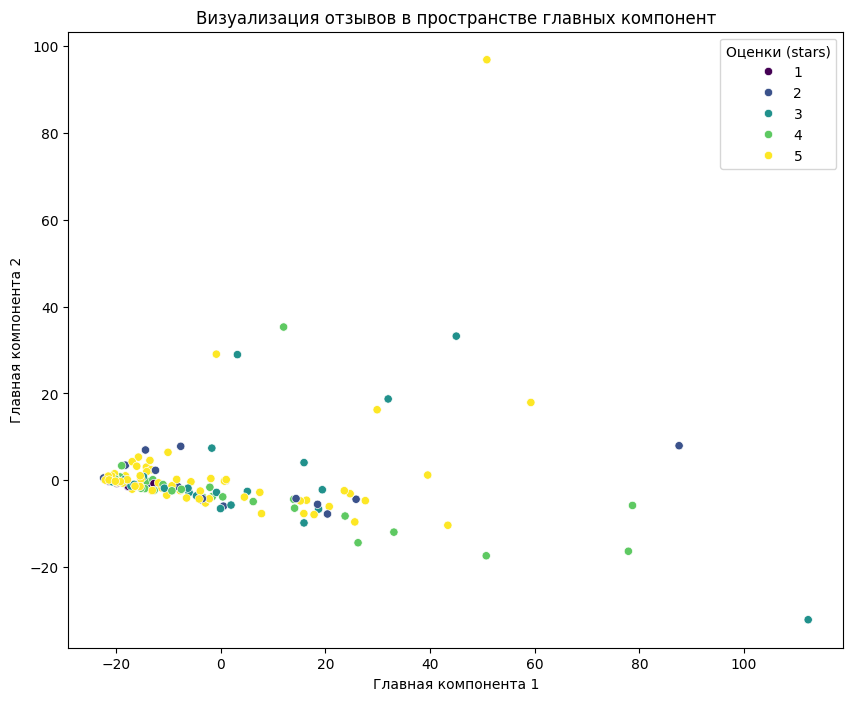

In [ ]:
df_visual = pd.concat([df, df_pca], axis=1)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_visual, hue='stars', palette='viridis')
plt.title('Визуализация отзывов в пространстве главных компонент')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend(title='Оценки (stars)')
plt.show()

In [ ]:
# матрица нагрузок
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=df_doc_term.columns)

top_loadings_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
top_loadings_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(10)

print("Топ 10 токенов для PC1:")
print(top_loadings_pc1)

print("\nТоп 10 токенов для PC2:")
print(top_loadings_pc2)

Топ 10 токенов для PC1:
и         0.536371
в         0.363783
не        0.330873
на        0.265526
что       0.202015
с         0.157176
аватар    0.156857
как       0.134408
воды      0.125711
я         0.125547
Name: PC1, dtype: float64

Топ 10 токенов для PC2:
аватар    0.469355
путь      0.464523
воды      0.446002
2022      0.365654
фильм     0.324020
в         0.149047
не        0.092255
и         0.089539
а         0.076003
как       0.075581
Name: PC2, dtype: float64


Интерпретация:

PC1: Токены с наибольшими нагрузками (как положительными, так и отрицательными) влияют на первую главную компоненту. Анализ этих токенов может помочь понять, что именно влияет на разделение данных вдоль PC1.

PC2: Аналогично, токены с наибольшими нагрузками для PC2 влияют на вторую главную компоненту.

In [ ]:
# только прилагательные

morph = pymorphy2.MorphAnalyzer()

def extract_adjectives(text):
    tokens = re.findall(r'\b\w+\b', text.lower())
    adjectives = []
    for token in tokens:
        parsed = morph.parse(token)[0]
        if 'ADJF' in parsed.tag or 'ADJS' in parsed.tag:
            adjectives.append(parsed.normal_form)
    return adjectives

df['adjectives'] = df['body'].apply(extract_adjectives)
df[['body', 'adjectives']]

,body,adjectives
0,\nПривет! Наконец-то он вышел! Долгожданное пр...,"[долгожданный, культовый, второй, новый, корыс..."
1,"\nПусть я буду той Бабой Ягой, которая против....","[тот, который, самый, технологический, весь, э..."
2,"\nПомню как в 2009 году меня поразил фильм ""Ав...","[затянутый, развивающийся, мой, творческий, са..."
3,\nЗдравствуйте. Сегодня я хочу поделиться с ва...,"[свой, тёмный, мой, который, зависимый, свой, ..."
4,\nМесто просмотра - Кыргыстан. Локация - IMAX ...,"[набитый, свободный, сам, никакой, другой, дол..."
...,...,...
134,"\nУдивительно , как можно за 3 часа побывать н...","[этот, этот, удивительный, семейный, подводный..."
135,"\nДобрый день! Ждал этого фильма, уже смотрел ...","[добрый, снятой, отдельный, трогательный, весь..."
136,\nКаждые новогодние праздники пересматриваем А...,"[каждый, новогодний, этот, мучительный, новый,..."
137,\nСтолько лет мы ждали продолжение этого захва...,"[снятой, трогательный, актёрский, высокий, бол..."


In [ ]:
df_adjectives_re = build_document_term_matrix_counters(df['adjectives'].apply(lambda x: Counter(x)))
df_adjectives_re

,2022основный,xdбольшой,абсолютный,аватарный,аватарский,адекватный,адский,аквамариновый,актерыкаждый,активный,...,эффектный,юношеский,юный,явный,ядовитый,японский,яркий,яростный,ярый,ясный
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_adjectives_counter = build_document_term_matrix_counters(df['adjectives'].apply(lambda x: Counter(x)))
df_adjectives_counter

,2022основный,xdбольшой,абсолютный,аватарный,аватарский,адекватный,адский,аквамариновый,актерыкаждый,активный,...,эффектный,юношеский,юный,явный,ядовитый,японский,яркий,яростный,ярый,ясный
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['adjectives_str'] = df['adjectives'].apply(lambda x: ' '.join(x))
vectorizer_adj_count = CountVectorizer()
X_adj_count = vectorizer_adj_count.fit_transform(df['adjectives_str'])
df_adj_count = pd.DataFrame(X_adj_count.toarray(), columns=vectorizer_adj_count.get_feature_names_out())
df_adj_count

,2022основный,xdбольшой,абсолютный,аватарный,аватарский,адекватный,адский,аквамариновый,актерыкаждый,активный,...,эффектный,юношеский,юный,явный,ядовитый,японский,яркий,яростный,ярый,ясный
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
vectorizer_adj_tfidf = TfidfVectorizer()
X_adj_tfidf = vectorizer_adj_tfidf.fit_transform(df['adjectives_str'])
df_adj_tfidf = pd.DataFrame(X_adj_tfidf.toarray(), columns=vectorizer_adj_tfidf.get_feature_names_out())
df_adj_tfidf

,2022основный,xdбольшой,абсолютный,аватарный,аватарский,адекватный,адский,аквамариновый,актерыкаждый,активный,...,эффектный,юношеский,юный,явный,ядовитый,японский,яркий,яростный,ярый,ясный
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.147255,0.174425,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.089012,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.064868,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
135,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
136,0.0,0.0,0.0,0.0,0.383614,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
137,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [ ]:
with open('positive.txt', 'r', encoding='utf-8') as f:
    positive_words = set(f.read().splitlines())

with open('negative.txt', 'r', encoding='utf-8') as f:
    negative_words = set(f.read().splitlines())

print(f'Позитивных слов: {len(positive_words)}')
print(f'Негативных слов: {len(negative_words)}')


Позитивных слов: 70
Негативных слов: 83


In [ ]:
def filter_adjectives_by_sentiment(adjectives, positive, negative):
    positive_adj = [word for word in adjectives if word in positive]
    negative_adj = [word for word in adjectives if word in negative]
    return positive_adj + negative_adj

df['adjectives_sentiment'] = df['adjectives'].apply(lambda x: filter_adjectives_by_sentiment(x, positive_words, negative_words))
df[['adjectives', 'adjectives_sentiment']]

,adjectives,adjectives_sentiment
0,"[долгожданный, культовый, второй, новый, корыс...","[прекрасный, великолепный, отличный, любимый, ..."
1,"[тот, который, самый, технологический, весь, э...","[яркий, яркий]"
2,"[затянутый, развивающийся, мой, творческий, са...","[позитивный, хороший, яркий, хороший, хороший,..."
3,"[свой, тёмный, мой, который, зависимый, свой, ...","[хороший, прекрасный, хороший, великолепный, х..."
4,"[набитый, свободный, сам, никакой, другой, дол...","[прекрасный, прекрасный, любимый, отличный, хо..."
...,...,...
134,"[этот, этот, удивительный, семейный, подводный...",[]
135,"[добрый, снятой, отдельный, трогательный, весь...",[добрый]
136,"[каждый, новогодний, этот, мучительный, новый,...",[мучительный]
137,"[снятой, трогательный, актёрский, высокий, бол...",[]


In [ ]:
df['adjectives_sentiment_str'] = df['adjectives_sentiment'].apply(lambda x: ' '.join(x))

vectorizer_sent_count = CountVectorizer()

X_sent_count = vectorizer_sent_count.fit_transform(df['adjectives_sentiment_str'])

df_sent_count = pd.DataFrame(X_sent_count.toarray(), columns=vectorizer_sent_count.get_feature_names_out())

df_sent_count


,бесконечный,благодарный,благородный,блестящий,великолепный,восхитительный,гармоничный,гениальный,добрый,достойный,...,разрушительный,решительный,светлый,страшный,счастливый,тяжёлый,ужасный,успешный,хороший,яркий
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,1
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
vectorizer_sent_tfidf = TfidfVectorizer()

X_sent_tfidf = vectorizer_sent_tfidf.fit_transform(df['adjectives_sentiment_str'])

df_sent_tfidf = pd.DataFrame(X_sent_tfidf.toarray(), columns=vectorizer_sent_tfidf.get_feature_names_out())

df_sent_tfidf

,бесконечный,благодарный,благородный,блестящий,великолепный,восхитительный,гармоничный,гениальный,добрый,достойный,...,разрушительный,решительный,светлый,страшный,счастливый,тяжёлый,ужасный,успешный,хороший,яркий
0,0.0,0.0,0.0,0.0,0.347818,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.441923,0.0,0.590598,0.283642
3,0.0,0.0,0.0,0.0,0.404520,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.858067,0.000000
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.450956,0.0,0.0,...,0.403391,0.0,0.0,0.450956,0.0,0.0,0.000000,0.0,0.200890,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
135,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
136,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
137,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [ ]:
pca_sent = PCA(n_components=2)
principal_components_sent = pca_sent.fit_transform(df_sent_count)

df_pca_sent = pd.DataFrame(data=principal_components_sent, columns=['PC1', 'PC2'])
df_pca_sent

,PC1,PC2
0,-0.375584,0.657920
1,-0.387001,0.540563
2,2.592042,-0.419201
3,2.466988,0.031782
4,0.765499,1.364680
...,...,...
134,-0.586549,-0.210102
135,-0.524099,0.061480
136,-0.591624,-0.215408
137,-0.586549,-0.210102


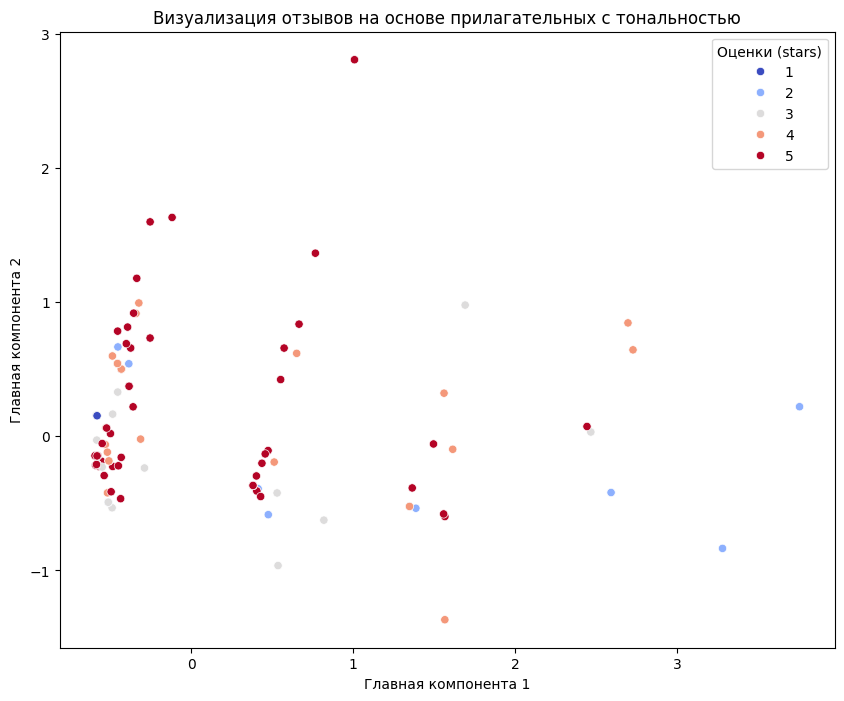

In [ ]:
df_visual_sent = pd.concat([df, df_pca_sent], axis=1)

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=df_visual_sent, hue='stars', palette='coolwarm')
plt.title('Визуализация отзывов на основе прилагательных с тональностью')
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.legend(title='Оценки (stars)')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_sent_count)

df_visual_sent['cluster'] = clusters

df_visual_sent['sentiment'] = df_visual_sent['stars'].apply(lambda x: 1 if x >=4 else (0 if x <=2 else None))

df_compare = df_visual_sent.dropna(subset=['sentiment'])

# Матрица путаницы
print(confusion_matrix(df_compare['sentiment'], df_compare['cluster']))
# Отчет по классификации
print(classification_report(df_compare['sentiment'], df_compare['cluster']))


[[ 5 19]
 [14 75]]
              precision    recall  f1-score   support

         0.0       0.26      0.21      0.23        24
         1.0       0.80      0.84      0.82        89

    accuracy                           0.71       113
   macro avg       0.53      0.53      0.53       113
weighted avg       0.68      0.71      0.69       113



Интерпретация:

Если кластеры совпадают с метками sentiment, то модель хорошо разделяет хорошие и плохие отзывы.

Если нет, можно изменить количество кластеров или метод классификации.

In [ ]:
df_sent_count.to_excel('results.xlsx', index=False)